In [1]:
import pandas as pd
import gc

import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

pd.set_option('display.float_format', '{:.10f}'.format)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from data_io import load_submission, load_oof, load_train

In [3]:
train = load_train()
oof = load_oof("outlier039_gbdt")
sub = load_submission("outlier039_gbdt")

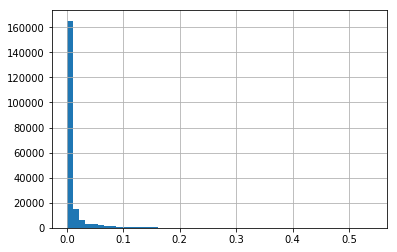

In [5]:
oof.outlier039_gbdt.hist(bins=50)

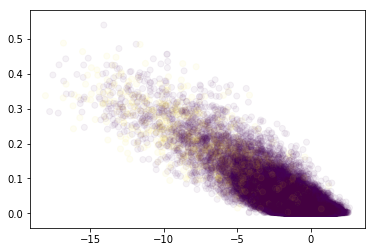

In [16]:
plt.scatter(pred_oof.lgb035_gbdt,
            oof.outlier039_gbdt,
            c=oof.target,
            alpha=.05)

In [11]:
pred_oof = load_oof("lgb035_gbdt")

In [17]:
for i in range(12):
    th = i * 0.04
    count = (oof.outlier039_gbdt > th).sum()
    mean_target = oof[(oof.outlier039_gbdt > th) & (pred_oof.lgb035_gbdt < -5)].target.mean()
    print(th, count, round(mean_target, 2))

0.0 201917 0.23
0.04 13525 0.23
0.08 5791 0.24
0.12 3136 0.25
0.16 1899 0.28
0.2 1202 0.28
0.24 726 0.3
0.28 429 0.33
0.32 210 0.34
0.36 99 0.33
0.4 36 0.33
0.44 13 0.38


In [37]:
for i in range(12):
    th = i * 0.04
    th_pred = -12
    cond = (oof.outlier039_gbdt > th) & (pred_oof.lgb035_gbdt < th_pred)
    count = cond.sum()
    mean_target = oof[cond].target.mean()
    print(th, count,
          round(mean_target, 2),
          rmse(pred_oof[cond].target, pred_oof[cond].lgb035_gbdt),
          rmse(pred_oof[cond].target, -33.2 * mean_target * np.ones(count)))

0.0 183 0.42 16.238646 16.18604241744186
0.04 183 0.42 16.238646 16.18604241744186
0.08 183 0.42 16.238646 16.18604241744186
0.12 183 0.42 16.238646 16.18604241744186
0.16 182 0.41 16.209246 16.16812454868201
0.2 180 0.41 16.154821 16.12952068927643
0.24 170 0.4 16.149206 16.127496633013273
0.28 140 0.4 16.079262 16.039949498015964
0.32 94 0.43 16.118696 16.15794865271869
0.36 52 0.4 16.029768 15.971936825037861
0.4 22 0.36 15.503693 15.56136155173809
0.44 8 0.5 16.373224 16.240362523641284


In [45]:
for i in range(12):
    th = i * 0.04
    th_pred = -12
    cond = (oof.outlier039_gbdt > th) & (pred_oof.lgb035_gbdt < th_pred)
    count = cond.sum()
    mean_target = oof[cond].target.mean()
    rmse_o = rmse(pred_oof[cond].target, pred_oof[cond].lgb035_gbdt)
    rmse_p = rmse(pred_oof[cond].target, -33.2 * mean_target * np.ones(count))
    print(th, count,
          round(mean_target, 2),
          round(rmse_o, 2),
          round(rmse_p, 2),
          round(rmse_o - rmse_p, 2))

0.0 183 0.42 16.24 16.19 0.05
0.04 183 0.42 16.24 16.19 0.05
0.08 183 0.42 16.24 16.19 0.05
0.12 183 0.42 16.24 16.19 0.05
0.16 182 0.41 16.21 16.17 0.04
0.2 180 0.41 16.15 16.13 0.03
0.24 170 0.4 16.15 16.13 0.02
0.28 140 0.4 16.08 16.04 0.04
0.32 94 0.43 16.12 16.16 -0.04
0.36 52 0.4 16.03 15.97 0.06
0.4 22 0.36 15.5 15.56 -0.06
0.44 8 0.5 16.37 16.24 0.13
